In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Loading the dataset

In [2]:
dataset = sns.load_dataset("iris")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**variety column is the dependent variable that we will classify using the necessary data.**

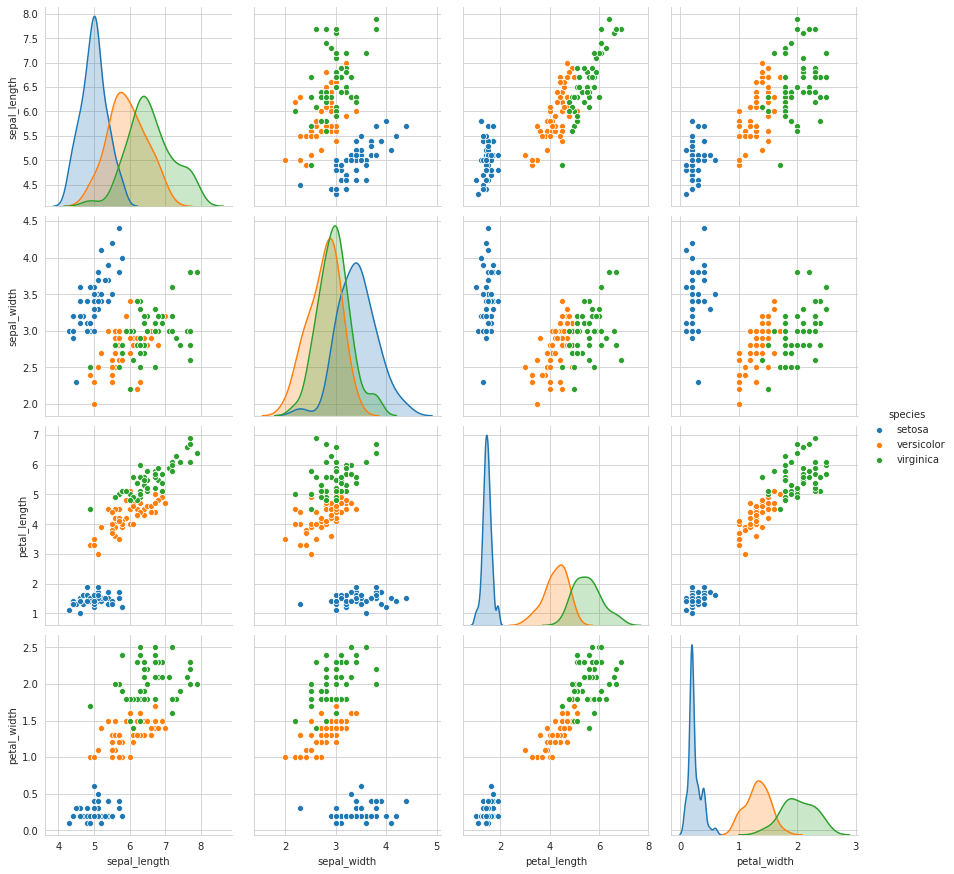

In [29]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="species", size=3);
plt.show()

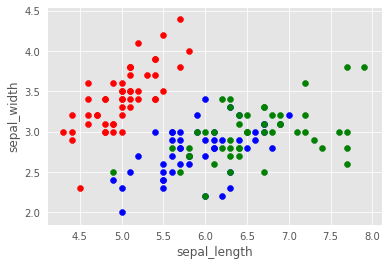

In [37]:
for n in range(0,150):
    if dataset['species'][n] == 'setosa':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'red')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
    elif dataset['species'][n] == 'versicolor':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'blue')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
    elif dataset['species'][n] == 'virginica':
        plt.scatter(dataset['sepal_length'][n], dataset['sepal_width'][n], color = 'green')
        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')

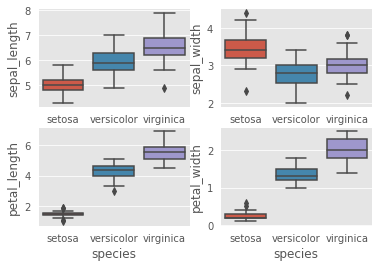

In [31]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'species', y = 'petal_length', data = dataset)
plt.subplot(2,2,4)
sns.boxplot(x = 'species', y = 'petal_width', data = dataset)

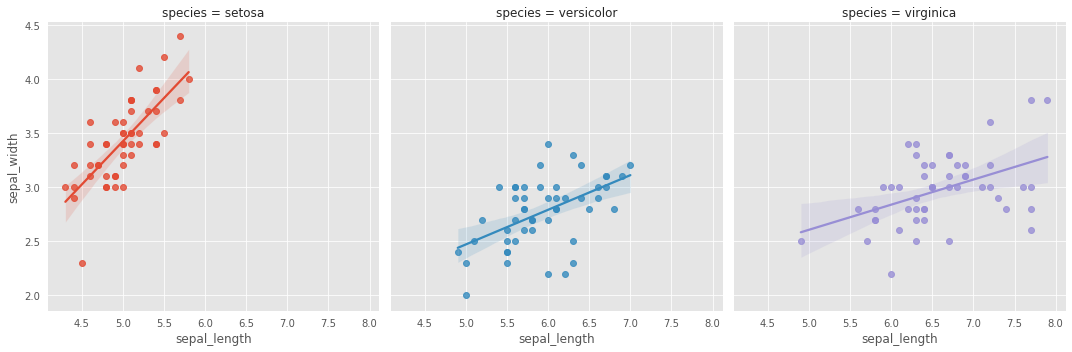

In [33]:
sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = dataset, hue = 'species', col = 'species')

# Preprocessing

**slicing the dataset**

In [8]:
X = dataset.iloc[:,:4].values
y = dataset.iloc[:,4:5].values

**We divide our data set into train and test to verify if our model is working correctly.**


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)


# Modelling

# Logistic Regression

Accuracy:  0.98 

Logistic Regression Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


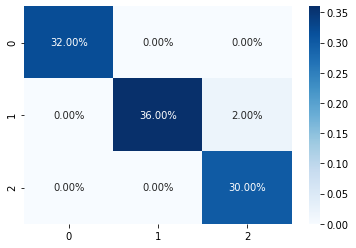

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("Logistic Regression Confusion Matrix\n", cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

# Support Vector Classifier

Accuracy:  0.98 

SVC Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


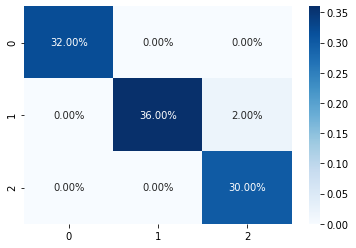

In [13]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear') #kernel = poly, rbf, precomputed
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("SVC Confusion Matrix\n", cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

# Naive Bayes
**Gaussian Naive Bayes**

Accuracy:  0.94 

GaussianNB Confusion Matrix
 [[16  0  0]
 [ 0 17  2]
 [ 0  1 14]] 



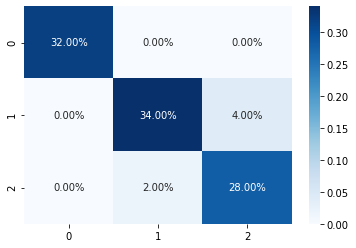

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("GaussianNB Confusion Matrix\n", cm, '\n')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


**Multinomial Naive Bayes**

Accuracy:  0.7 

MultinomialNB Confusion Matrix
 [[16  0  0]
 [ 0  4 15]
 [ 0  0 15]] 



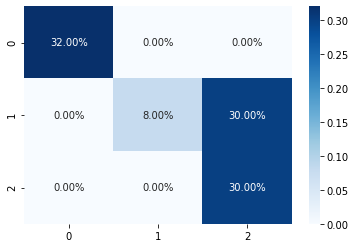

In [15]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("MultinomialNB Confusion Matrix\n", cm, '\n')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


**Complement Naive Bayes**

Accuracy:  0.62 

ComplementNB Confusion Matrix
 [[16  0  0]
 [ 0  0 19]
 [ 0  0 15]] 



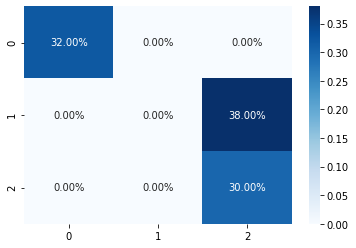

In [16]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("ComplementNB Confusion Matrix\n", cm, '\n')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

**Bernoulli Naive Bayes**

Accuracy:  0.7 

BernoulliNB Confusion Matrix
 [[16  0  0]
 [ 2  5 12]
 [ 0  1 14]] 



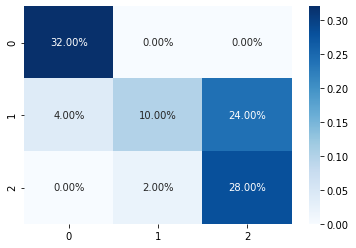

In [17]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("BernoulliNB Confusion Matrix\n", cm, '\n')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

**Categorical Naive Bayes**

Accuracy:  0.92 

CategoricalNB Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  3 12]] 



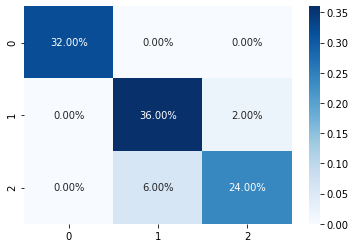

In [18]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("CategoricalNB Confusion Matrix\n", cm, '\n')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

# KNeighbors Classifier

Accuracy:  0.96 

KNeighborsClassifier Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


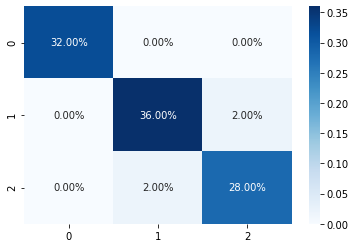

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("KNeighborsClassifier Confusion Matrix\n", cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

# Decision Tree Classifier

Accuracy:  0.98 

DecisionTreeClassifier Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


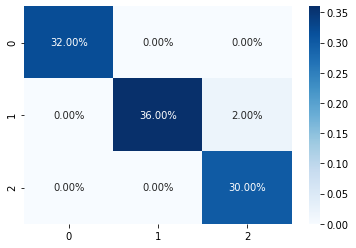

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("DecisionTreeClassifier Confusion Matrix\n", cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

# Random Forest Classifier

Accuracy:  0.98 

KNeighborsClassifier Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]


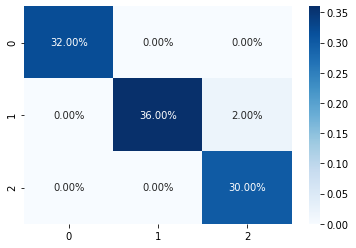

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("KNeighborsClassifier Confusion Matrix\n", confusion_matrix(y_test, y_pred))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

**if xgboost is not installed**

In [8]:
!pip install xgboost

     |████████████████████████████████| 127.6 MB 2.1 MB/s eta 0:00:01    |█████████████████████▍          | 85.4 MB 5.0 MB/s eta 0:00:09     |████████████████████████        | 95.9 MB 2.3 MB/s eta 0:00:14


# XGBClassifier

Accuracy:  0.96 

XGBClassifier Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


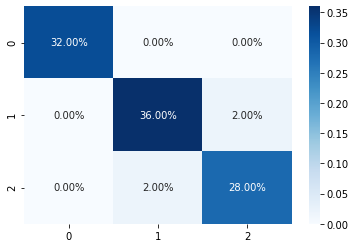

In [22]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 100)
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("XGBClassifier Confusion Matrix\n", cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

# AdaBoost

Accuracy:  0.9 

AdaBoostClassifier Confusion Matrix
 [[16  0  0]
 [ 0 18  1]
 [ 0  4 11]]


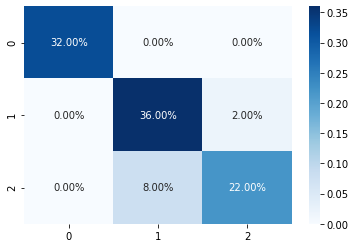

In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 50)
model.fit(x_train,y_train.ravel())
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print("AdaBoostClassifier Confusion Matrix\n", cm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')